# Recurrent Neural Network Homework

In this assignment, we will implement a basic RNN network and an LSTM network with Pytorch to solve two problems. \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 80 points, with extra 10 bonus points)** \
You may use Machine Learning libaries like Scikit-learn for data preprocessing.

**Task Overview:**
- Implement a basic RNN network to solve time series prediction
- Implement an LSTM network to conduct sentiment analysis

## 1 - Implement a RNN model to predict time series##
### 1.1 Prepare the data (10 Points)

Prepare time series data for deep neural network training.

**Tasks:**
1. Load the given train and test data: "train.txt" and "test.txt". **(2.5 Points)**
2. Generate the **TRAIN** and **TEST** labels. **(2.5 Points)**
3. Normalize the **TRAIN** and **TEST** data with sklearn function "MinMaxScaler". **(2.5 Points)**
4. **PRINT OUT** the **TEST** data and label. **(2.5 Points)**

**Hints:**  
1. The length of original train data is 113 which starts from **"1949-01"** to **"1958-05"**. The length of original test data is 29, which starts from **"1958-07"** to **"1960-11"**.
2. Set the data types of both train and test data to "float32".
3. Use **past 12** datapoints as input data X to predict the **next 1** datapoint as Y, which is the 'next token prediction'. The time window will be 12.
4. The first 3 **TRAIN** data and label should be:

- trainX[0] = [[0.02203858 &nbsp; 0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp; 0.03856748]]
- trainY[0] = [0.03030303]

- trianX[1] = [[0.03856748 &nbsp; 0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197  &nbsp; 0.08539945  &nbsp; 0.12121212  &nbsp; 0.12121212  &nbsp; 0.08815429  &nbsp; 0.04132232  &nbsp; 0.     &nbsp;  0.03856748   &nbsp; 0.03030303]]
- trainY[1] = [0.06060606]

- trainX[2] =  [[0.077135 &nbsp;  0.06887051 &nbsp; 0.04683197 &nbsp; 0.08539945 &nbsp; 0.12121212 &nbsp; 0.12121212 &nbsp; 0.08815429 &nbsp; 0.04132232 &nbsp; 0.    &nbsp;     0.03856748 &nbsp; 0.03030303 &nbsp; 0.06060606]]
- trainY[2] = [0.10192838]

5. Apply the MinMaxScaler to both the train and test data.\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

In [49]:
import numpy as np
from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

def gen_labels(data):
  X, Y = [], []
  # Pairs 12 X to a single Y, leveraging time sequence as a context for our generation
  for i in range(len(data) - 12):
    X.append(data[i:i+12])
    Y.append(data[i+12])
  return np.array(X), np.array(Y)


In [60]:
import torch #Needed to convert arrays to tensors for Torch RNN

# Step 1. Use pandas to read training and testing from txt file. (2.5 pts)
train_data = read_csv("train.txt")
test_data = read_csv("test.txt")

# Step 2. Generate train and test labels. (2.5 pts)
train_label = train_data["Passengers"].astype(np.float32).values
test_label = test_data["Passengers"].astype(np.float32).values

# Step 2. Normalize training and test data into [0, 1]. (2.5 pts)
scale = MinMaxScaler()
train_scaled = scale.fit_transform(train_label.reshape(-1, 1))
test_scaled = scale.transform(test_label.reshape(-1, 1))

# Step 3. Create a training and test datasets. (2.5 pts)
trainX, trainY = gen_labels(train_scaled)
testX, testY = gen_labels(test_scaled)

# Step 4. Print out the shape of data. (2.5 pts)
print(f"Shape of trainX: {trainX.shape}")
print(f"Shape of trainY: {trainY.shape}")
print(f"Shape of testX: {testX.shape}")
print(f"Shape of testY: {testY.shape}")

#Print first 3 values for debugging
print("\ntrainX[0] =", trainX[0])
print("\ntrainY[0] =", trainY[0])
print("\ntrainX[1] =", trainX[1])
print("\ntrainY[1] =", trainY[1])
print("\ntrainX[2] =", trainX[2])
print("\ntrainY[2] =", trainY[2])

trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

Shape of trainX: (101, 12, 1)
Shape of trainY: (101, 1)
Shape of testX: (17, 12, 1)
Shape of testY: (17, 1)

trainX[0] = [[0.02203858]
 [0.03856748]
 [0.077135  ]
 [0.06887051]
 [0.04683197]
 [0.08539945]
 [0.12121212]
 [0.12121212]
 [0.08815429]
 [0.04132232]
 [0.        ]
 [0.03856748]]

trainY[0] = [0.03030303]

trainX[1] = [[0.03856748]
 [0.077135  ]
 [0.06887051]
 [0.04683197]
 [0.08539945]
 [0.12121212]
 [0.12121212]
 [0.08815429]
 [0.04132232]
 [0.        ]
 [0.03856748]
 [0.03030303]]

trainY[1] = [0.06060606]

trainX[2] = [[0.077135  ]
 [0.06887051]
 [0.04683197]
 [0.08539945]
 [0.12121212]
 [0.12121212]
 [0.08815429]
 [0.04132232]
 [0.        ]
 [0.03856748]
 [0.03030303]
 [0.06060606]]

trainY[2] = [0.10192838]


### 1.2 - Build the RNN model (30 Points) ##


Build a RNN model with RNN cell.

**Tasks:**
1. Build an RNN model with 1 RNN layer and 1 Linear layer, with RNN's hidden size to be 4.  **(15 Points)**
2. Initialize model, optimizer and criterion. **(7.5 Points)**
3. Train the model for **1000** epochs with **batch_size = 10** and **print out the average traning loss for every 100 epochs**. **(7.5 Points)**

**Hints:**  
1. You can use **nn.RNN** to specify RNN cells.
2. Use loss function (criterion) **MSELoss()** and select **Adam** optimizer with **learning_rate=0.005** and other default settings.

In [91]:
import torch.nn as nn
import torch.optim as optim #For Adam optimizer
import torch #Needed to convert numpy array to tensor

# Complete the model architecture (10 pts)
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size
    self.rnn = nn.RNN(input_size= input_size, hidden_size= hidden_size)
    self.fc = nn.Linear(hidden_size, output_size)

  def forward(self, x):
    output, _ = self.rnn(x)
    last_time_step = output[:, -1, :]
    output = self.fc(last_time_step)
    return output

# Create an instance of model, optimizer and criterion. (5 pts)
model = RNN(input_size=1, hidden_size=4, output_size=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Train the RNN Model for 1000 epoch and print out the training loss for every 100 epochs. (5 pts)
model.train()
loss_history = []

#Ensure that arrays are of type tensor (they might get switched depending if you run 1.2 -> 1.3 -> 1.2)
if not isinstance(trainX, torch.Tensor):
  trainX = torch.from_numpy(trainX).float()
if not isinstance(trainY, torch.Tensor):
  trainY = torch.from_numpy(trainY).float()

for epoch in range(1000):
  epoch_loss = 0
  #Iterate through the dataset in steps of 10
  for i in range(0, len(trainX), 10):
    #Get batch
    X_batch = trainX[i:i+10]
    Y_batch = trainY[i:i+10]

    #Set gradient
    optimizer.zero_grad()

    #Forward
    outputs = model(X_batch)
    loss = criterion(outputs, Y_batch)

    #Backward
    loss.backward()
    optimizer.step()

    #Add up the loss
    epoch_loss += loss.item()

  #Store the loss and print
  loss_history.append(epoch_loss)
  if(epoch+1) % 100 == 0:
    print(f"Epoch {epoch+1}, Loss: {epoch_loss}")


Epoch 100, Loss: 0.05452340384363197
Epoch 200, Loss: 0.051684316276805475
Epoch 300, Loss: 0.051916517673817
Epoch 400, Loss: 0.05191093216490117
Epoch 500, Loss: 0.05171469767083181
Epoch 600, Loss: 0.052293038221250754
Epoch 700, Loss: 0.05216508648300078
Epoch 800, Loss: 0.052810736480751075
Epoch 900, Loss: 0.04985491312254453
Epoch 1000, Loss: 0.05068298239075375


### 1.3 Evaluate Predictive Model Performance (**Bonuse point 10 Points**)

Predict datapoints with the observed datapoints and trained model.

**Tasks:**
1. Make prediction on train and test datapoints with the obtained model in section 1.2. **(2 Points)**
2. Denormalize the prediction results back to original scale with the scaler.(scaler.inverse_transform function) **(3 Points)**
3. Calculate root mean squared error (RMSE) and **print out** the error for **both TRAIN and TEST**. **(3 Points)**
4. **Plot** the **TEST** label and prediction. **(2 Points)**


**Hints:**  
1. Scale back the predictions with the build-in function "scaler.inverse_transform".\
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler.inverse_transform
2. The plot for validation is shown below (observation test data are blue and prediction results are orange):
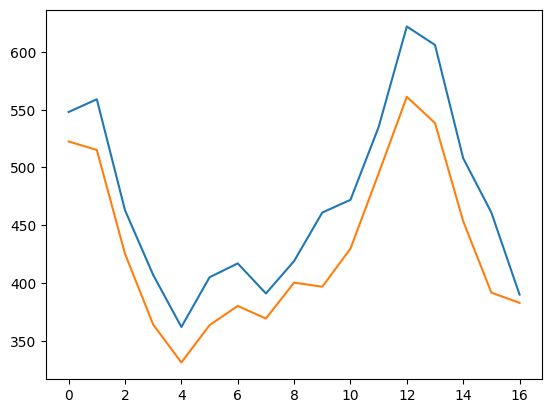

<span style="color:magenta">
    The corresponding figures could be different from the one above, but should be reasonable.**
</span>


Train RMSE: 24.628026962280273
Test RMSE: 53.51365280151367


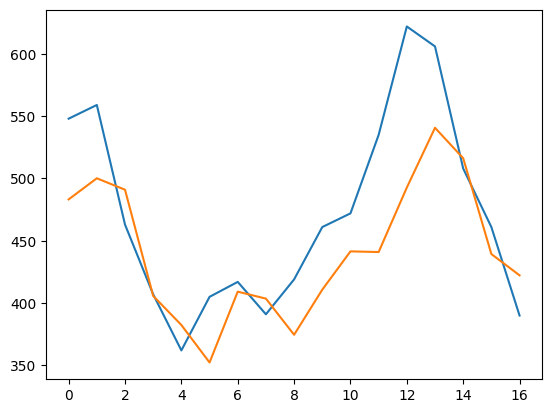

In [92]:
import matplotlib.pyplot as plt

# Step 1. Inference above model on training and testing data. (2 pts)
def predict(model, data):
  model.eval()
  with torch.no_grad():
    predictions = model(data)
  return predictions.numpy()

train_predicitions = predict(model, trainX)
test_predictions = predict(model, testX)

#Return data to numpy arrays for ease of calculation
if isinstance(trainY, torch.Tensor):
  trainY = trainY.numpy()
if isinstance(testY, torch.Tensor):
  testY = testY.numpy()

# Step 2. Denomalization. (3 pts)
def denorm(data, scaler_min, scaler_max):
  return data * (scaler_max - scaler_min) + scaler_min

trainX_denorm = denorm(train_predicitions, scale.data_min_[0], scale.data_max_[0])
testX_denorm = denorm(test_predictions, scale.data_min_[0], scale.data_max_[0])
trainY_denorm = denorm(trainY, scale.data_min_[0], scale.data_max_[0])
testY_denorm = denorm(testY, scale.data_min_[0], scale.data_max_[0])


# Step 3. Calculate root mean squared error for training and testing and print. (3 pts)
def rmse(true, predicted):
  term = (true - predicted) ** 2
  return np.sqrt(np.mean(term))

train_rmse = rmse(trainY_denorm, trainX_denorm)
test_rmse = rmse(testY_denorm, testX_denorm)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

# Step 4. Plot the predictions. (2 pts)
plt.plot(testY_denorm)
plt.plot(testX_denorm)
plt.show()

## 2 - Use LSTM model to conduct sentiment analysis ##

### 2.1 Prepare the data (10 Points) ###
Conduct sentiment analysis using IMDB data with reccurent neural network. Make prediction on sentiment (positive/negative) as a binary classification.
More details can be found here, https://keras.io/api/datasets/imdb/

**Tasks:**
1. Load the data from IMDB review dataset and **print out** the lengths of sequences. **(5 Points)**
2. Preprocess review data to meet the network input requirement by specifying **number of words=1000**, setting **the analysis length of the review = 100**, and **padding the input sequences**. **(5 Points)**

**Hints:**  
1. You may load the IMDB data with keras.datasets.imdb.load_data(num_words=max_features). Here, max_features is set to **1000**.
2. You may use keras.preprocessing.sequence.pad_sequences(x_train, maxlen) to pad the input sequences and set maxlen to **100**.

**Note:**\
We train the build LSTM-based model with ALL training data; the **validation set** (aka **development set**) is set with the **testing set** for model evaluation. This split is common in the application with limited sampled observation data, like NLP problems.

In [93]:
import torch
import random
import numpy as np

from keras.preprocessing import sequence
from keras.datasets import imdb

# Step 1. Load IMDB dataset from keras. (5 pts)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=1000)

# Step 2. Preprocess the sequences with padding (5 pts)
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)


### 2.2 - Design and train LSTM model (30 Points) ###

Build a LSTM model.

**Tasks:**
1. Build the LSTM model with **1 embedding layer**, **1 LSTM layer**, and **1 Linear layer**. The embedding vector is specified with the dimension of **8**. **(15 Points)**
2. Create LSTM model with **Adam** optimizer, **binary_crossentropy** loss function (BCELoss()). **(5 Points)**  
3. Train the LSTM model with **batch_size=64 for 10 epochs** and report **training and validation accuracies over epochs**. You need to use TensorDataset and DataLoader to split the data into batches with batch_size and shuffle the data. **(5 Points)**
4. **Print out** best validation accuracy. **(5 Points)**



**Hints:**  
1. Set input dimension to **1000** and output dimension to **8** for embedding layer.
2. You need to initialize hidden(h) and cell(c) for the lstm and always use h and c as input to your lstm layer. (For performance)
3. Set **hidden dimension = 8** for LSTM layer.
4. Use only the last layer as the input of linear layer (For performance)
5. Set activation function to **sigmoid** for Linear layer.
6. You may have some trouble with the data dimension, please consider using squeeze or unsqueeze to make two data have the same dimension.
7. Write a constructor with many configurations (number of layers, embedding dimension...) could save you a lot of time for the bonus questions since you can reuse the code here.

In [100]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Complete LSTM model architecture. (20 pts)
class LSTMClassifier(nn.Module):
  def __init__(self, max_features, embedding_dim, hidden_dim, num_layers, output_dim):
    super(LSTMClassifier, self).__init__()
    self.embeddings = nn.Embedding(max_features, embedding_dim)
    self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
    self.classifier = nn.Linear(hidden_dim, output_dim)
    self.activation = nn.Sigmoid() #Sigmoid activation function for linear classifier

  def forward(self, sentence):
    embedded = self.embeddings(sentence) #Pass through embedding
    lstm_out, (h, c) = self.lstm(embedded) #Pass LSTM layer
    output = self.classifier(lstm_out[:, -1, :]) #Take final output of linear layer
    output = self.activation(output) #Sigmoid activation of linear layer
    return output


# Create an instance of LSTM model, an adam optimizer and BCE loss. (5 pts)
model = LSTMClassifier(max_features=1000, embedding_dim=8, hidden_dim=8, num_layers=1, output_dim=1)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

criterion = nn.BCELoss()

# Train the model, print out the loss. (5 pts)

best_val_acc = 0.0

# Prep data
# Tensor for pytorch compt.
x_train_tensor = torch.tensor(x_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create batching with torch
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64)
test_loader = DataLoader(test_dataset, batch_size=64)

for epoch in range(10):
  model.train()
  total_loss = 0.0
  for inputs, labels in train_loader:
    optimizer.zero_grad() #Zero the gradient

    #Forward
    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    #Backward
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
  #Validation
  model.eval()
  correct = 0
  total = 0

  avg_loss = total_loss / len(train_loader)
  print(f"Epoch {epoch + 1}/{10}, Loss: {avg_loss:.4f}")
  with torch.no_grad():
    for inputs, targets in test_loader:
      outputs = model(inputs).squeeze()
      predictions = (outputs >= 0.5).float()  # Convert probabilities to binary predictions
      correct += (predictions == targets).sum().item()
      total += targets.size(0)

    val_acc = correct / total
    print(f"Validation Accuracy: {val_acc:.4f}")

    # Save best validation accuracy
    if val_acc > best_val_acc:
        best_val_acc = val_acc

# Print out the best validation accuracy. (5 pts)
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

Epoch 1/10, Loss: 0.6379
Validation Accuracy: 0.7374
Epoch 2/10, Loss: 0.4887
Validation Accuracy: 0.7892
Epoch 3/10, Loss: 0.4187
Validation Accuracy: 0.8122
Epoch 4/10, Loss: 0.3829
Validation Accuracy: 0.8204
Epoch 5/10, Loss: 0.3645
Validation Accuracy: 0.8260
Epoch 6/10, Loss: 0.3509
Validation Accuracy: 0.8252
Epoch 7/10, Loss: 0.3412
Validation Accuracy: 0.8336
Epoch 8/10, Loss: 0.3348
Validation Accuracy: 0.8330
Epoch 9/10, Loss: 0.3253
Validation Accuracy: 0.8316
Epoch 10/10, Loss: 0.3202
Validation Accuracy: 0.8229
Best Validation Accuracy: 0.8336
